# AIRCRAFT ACCIDENT RISK ANALYSIS
# AUTHOR: TERESIA NJOKI

# DATE:24/03/2025

# PROBLEM STATEMENT

Your company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

# OBJECTIVE

Determining which aircraft are the lowest risk for the company to purchase and start this new business endeavor,determine the best route to travel commercially and evaluating the impact of aircraft configuration,engine type and amateur built status on accidents risk.

We will achieve this by analyzing potential risk of accidents by:

## i)Risk anaylsis by Aircraft Model and Manufacturer

## ii)Mechanical Failure by Aircraft Type

## iii)Accidents Hotspots by Location

## IV)Broad Phase of Aircraft


# DATASET

## https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses

# 1)Import Libraries and set up

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## 2)Load and Inspect Data

In [2]:
#Name dataset as unclean dataset and select head to see the first five elements
Aviation_Data_Unclean=pd.read_csv('AviationData.csv',encoding='latin1')
df=pd.DataFrame(Aviation_Data_Unclean)
df.head()

C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


# 3)Check info and Summary Statistics of the Dataset

In [3]:
#check info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

From the information above we can see that our dataset has 88889 entries and 31 columns of type floats and objects.We can also detect some missing values on some columns ie: Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Airport.Category,Registration.Number,Make,Model,Amateur Built,Number.of.Engines,Engine.Type,FAR Description,
Report.Status and Publication.Date

In [4]:
#check shape of the dataset to know how many columns and rows it has
df.shape
print(f'This data set consists of {df.shape[0]} rows')
print(f'This data set consists of {df.shape[1]} columns')

This data set consists of 88889 rows
This data set consists of 31 columns


In [5]:
#check summary statistics of the Dataset
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


# 4)Data Cleaning and Reprocessing

## a)Check Dataset for Duplicate values


In [6]:
#check for duplicate values
df_duplicates=df.duplicated().value_counts()
print(df_duplicates)
#check for length of duplicate values
duplicates=df[df.duplicated()]
print(len(duplicates))

False    88889
dtype: int64
0


From the ouput above our dataset has no duplicate values

## b)Check Dataset for Erraneous /Eronous values

In [7]:
#check for erraneous/erronous values
for col in df.columns:
    print(col,'\n',df[col].value_counts(normalize=True).head(), '\n\n')

Event.Id 
 20001212X19172    0.000034
20001214X45071    0.000034
20001206X01549    0.000022
20061015X01521    0.000022
20001213X34415    0.000022
Name: Event.Id, dtype: float64 


Investigation.Type 
 Accident    0.956418
Incident    0.043582
Name: Investigation.Type, dtype: float64 


Accident.Number 
 DCA22WA089    0.000022
ERA22LA364    0.000022
CEN22LA149    0.000022
DCA22WA130    0.000022
WPR22FA309    0.000022
Name: Accident.Number, dtype: float64 


Event.Date 
 1984-06-30    0.000281
1982-05-16    0.000281
2000-07-08    0.000281
1986-05-17    0.000270
1984-08-25    0.000270
Name: Event.Date, dtype: float64 


Location 
 ANCHORAGE, AK      0.004885
MIAMI, FL          0.002251
ALBUQUERQUE, NM    0.002206
HOUSTON, TX        0.002173
CHICAGO, IL        0.002071
Name: Location, dtype: float64 


Country 
 United States     0.927647
Brazil            0.004218
Canada            0.004049
Mexico            0.004038
United Kingdom    0.003880
Name: Country, dtype: float64 


Latitude 
 3

## c)Check for Missing Values

In [8]:
#check for missing values
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

From the Dataset output we tend to have alot of missing values in the columns section,for the non critical columns we will drop the columns which more than 50% of their data is missing.

In [9]:
#list all column names
print(df.columns)

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')


In [10]:
#dropping the columns that have more than 50% of their data missing and are not critical.
df=df.drop(['Aircraft.Category','FAR.Description','Air.carrier','Schedule'],axis=1,errors='ignore')

In [11]:
#find out if they have been dropped,they should now be 27 columns
df.shape

(88889, 27)

Now we will fill the null values in our remaining columns.For the numerical(continous)columns we will fill the null values with the median and for the categorical columns with unknown string.

In [12]:
#lets find out the number of strings/integers in our dataset
string_columns = df.select_dtypes(include=['object']).columns.tolist()
integer_columns = df.select_dtypes(include=['int64']).columns.tolist()
print("String (Object) Columns:", string_columns)
print("Integer Columns:", integer_columns)

String (Object) Columns: ['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date', 'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Injury.Severity', 'Aircraft.damage', 'Registration.Number', 'Make', 'Model', 'Amateur.Built', 'Engine.Type', 'Purpose.of.flight', 'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status', 'Publication.Date']
Integer Columns: []


lets convert latitude and longitutude to floats(numerical columns) for mapping.

In [13]:
# Convert to float
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')

# Verify if conversion is successful
print(df[['Latitude', 'Longitude']].dtypes)

Latitude     float64
Longitude    float64
dtype: object


In [14]:
#lets fill  the null values in the categorical(string objects) with unnknown string
df_clean=df.copy()
columns_to_fill=['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date','Location', 'Country', 'Airport.Code', 'Airport.Name', 'Injury.Severity', 'Aircraft.damage', 'Registration.Number', 'Make', 'Model', 'Amateur.Built', 'Engine.Type', 'Purpose.of.flight', 'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status', 'Publication.Date']
df_clean[columns_to_fill] = df_clean[columns_to_fill].fillna('Unknown')
#lets fill the null values in the numerical columns with median
columns_to_fill=['Number.of.Engines','Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured','Latitude', 'Longitude']
df_clean[columns_to_fill] = df_clean[columns_to_fill].fillna(df_clean[columns_to_fill].median())

In [15]:
#print to see if their any nan values left
print(df_clean.isnull().sum())

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Latitude                  0
Longitude                 0
Airport.Code              0
Airport.Name              0
Injury.Severity           0
Aircraft.damage           0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
Publication.Date          0
dtype: int64


From the output above we can see their are no null values present in the columns and we can now display the clean Data Frame

In [16]:
print(df_clean.info())
df_clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88889 non-null  object 
 5   Country                 88889 non-null  object 
 6   Latitude                88889 non-null  float64
 7   Longitude               88889 non-null  float64
 8   Airport.Code            88889 non-null  object 
 9   Airport.Name            88889 non-null  object 
 10  Injury.Severity         88889 non-null  object 
 11  Aircraft.damage         88889 non-null  object 
 12  Registration.Number     88889 non-null  object 
 13  Make                    88889 non-null  object 
 14  Model                   88889 non-null

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,38.167361,-95.478611,Unknown,Unknown,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,Unknown
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,38.167361,-95.478611,Unknown,Unknown,...,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,Unknown,Unknown,...,Reciprocating,Personal,3.0,0.0,0.0,1.0,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,38.167361,-95.478611,Unknown,Unknown,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,38.167361,-95.478611,Unknown,Unknown,...,Unknown,Personal,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,16-04-1980


Now let us save  a copy of the cleaned DataFrame and begin our analysis

In [17]:
df_clean.to_csv('AviationData_cleaned.csv')

# 5)Exploratory Data Analysis

## i)Risk anaylsis by Aircraft Model and Manufacturer

### Number of accidents per make and model

In [18]:
df_grouped=df_clean.groupby(['Make','Model'])[['Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured']].sum().reset_index()
df_grouped.head(10)



,Make,Model,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
0,107.5 Flying Corporation,One Design DR 107,1.0,0.0,0.0,1.0
1,1200,G103,0.0,1.0,0.0,1.0
2,177MF LLC,PITTS MODEL 12,0.0,2.0,0.0,0.0
3,1977 Colfer-chan,STEEN SKYBOLT,0.0,0.0,1.0,1.0
4,1st Ftr Gp,FOCKE-WULF 190,1.0,0.0,0.0,0.0
5,2000 Mccoy,Genesis,1.0,0.0,0.0,1.0
6,2001 Mcgirl,QUESTAIR VENTURE,0.0,1.0,0.0,1.0
7,2003 Nash,Kitfox II,0.0,0.0,1.0,1.0
8,2007 Savage Air LLC,EPIC LT,0.0,0.0,0.0,4.0
9,2021FX3 LLC,CCX-2000,0.0,0.0,0.0,4.0


In [19]:
accidents_by_model = df_clean.groupby(['Make', 'Model'])['Event.Id'].count().reset_index()
accidents_by_model.rename(columns={'Event.Id': 'Total_Accidents'}, inplace=True)

# Sort from highest to lowest accidents
accidents_by_model = accidents_by_model.sort_values(by='Total_Accidents', ascending=False)

print(accidents_by_model.head(10)) 

         Make      Model  Total_Accidents
5755   Cessna        152             2168
5777   Cessna        172             1254
5821   Cessna       172N              996
15099   Piper  PA-28-140              812
5730   Cessna        150              716
5819   Cessna       172M              667
5824   Cessna       172P              597
14993   Piper      PA-18              539
5754   Cessna       150M              539
15108   Piper  PA-28-161              502


### Number of Fatality Rate by Make and Model

In [20]:
fatalities_by_model = df_clean.groupby(['Make', 'Model'])[['Total.Fatal.Injuries']].sum().reset_index()
fatalities_by_model['Total_Accidents'] = df_clean.groupby(['Make', 'Model'])['Event.Id'].count().values

fatalities_by_model['Fatality_Rate'] = fatalities_by_model['Total.Fatal.Injuries'] / fatalities_by_model['Total_Accidents']

# Sort by highest fatality rate
fatalities_by_model = fatalities_by_model.sort_values(by='Fatality_Rate', ascending=False)
print(fatalities_by_model.head(10))  # Show top 10 most fatal aircraft models

                    Make        Model  Total.Fatal.Injuries  Total_Accidents  \
4077              Boeing      747-168                 349.0                1   
19048            Tupolev       TU-154                 349.0                1   
4179              Boeing   767-366-ER                 217.0                1   
2449              BOEING    777 - 206                 534.0                3   
13073  Mcdonnell Douglas      DC-8-62                 174.0                1   
1293    Airbus Industrie        A 310                 169.0                1   
325               AIRBUS   A320 - 216                 162.0                1   
8278             Embraer  E135 Legacy                 154.0                1   
2498              BOEING        MD-83                 153.0                1   
310               AIRBUS         A310                 152.0                1   

       Fatality_Rate  
4077           349.0  
19048          349.0  
4179           217.0  
2449           178.0  
1307

### Barh graph plot for top 10 models by Fatality Rate

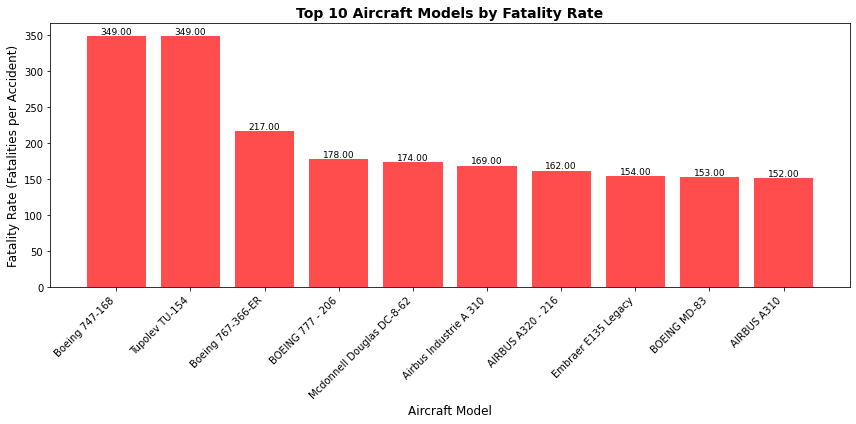

In [21]:

top_10_fatal = fatalities_by_model.head(10)

# Create a figure and axis
plt.figure(figsize=(12, 6))
bars = plt.bar(
    top_10_fatal['Make'] + ' ' + top_10_fatal['Model'],  # Combine Make and Model for labels
    top_10_fatal['Fatality_Rate'],
    color='red',
    alpha=0.7
)

# Add labels and title
plt.xlabel('Aircraft Model', fontsize=12)
plt.ylabel('Fatality Rate (Fatalities per Accident)', fontsize=12)
plt.title('Top 10 Aircraft Models by Fatality Rate', fontsize=14, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.2f}',
        ha='center',
        va='bottom',
        fontsize=9
    )

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()

### Survival Rate for Each Aircraft Model

In [22]:
survival_by_model = df_clean.groupby(['Make', 'Model'])[['Total.Uninjured', 'Total.Fatal.Injuries']].sum().reset_index()
survival_by_model['Survival_Rate'] = survival_by_model['Total.Uninjured'] / (survival_by_model['Total.Uninjured'] + survival_by_model['Total.Fatal.Injuries'])

# Sort by highest survival rate
survival_by_model = survival_by_model.sort_values(by='Survival_Rate', ascending=False)

print(survival_by_model.head(10))  # Show top 10 safest aircraft models

                    Make                 Model  Total.Uninjured  \
9771             Grumman                  C-1A              3.0   
11336               Judd         Challenger II              1.0   
11339              Jurca          3/4 SPITFIRE              1.0   
11344               Just  JUST AIRCRAFT (HIGHL              1.0   
11346  Just Aircraft Llc            Highlander              1.0   
11348    K. A. Covington           LANCAIR 320              1.0   
11351  KAKELDEY RONALD O        SMITH PA12 EXP              2.0   
11352   KALDOR GREGORY N            ZENITH 701              1.0   
11353      KALMAN GEORGE           LANCAIR 360              2.0   
11354              KAMAN                K-1200              1.0   

       Total.Fatal.Injuries  Survival_Rate  
9771                    0.0            1.0  
11336                   0.0            1.0  
11339                   0.0            1.0  
11344                   0.0            1.0  
11346                   0.0          

### Barh graph plot for survival Rate by make and model

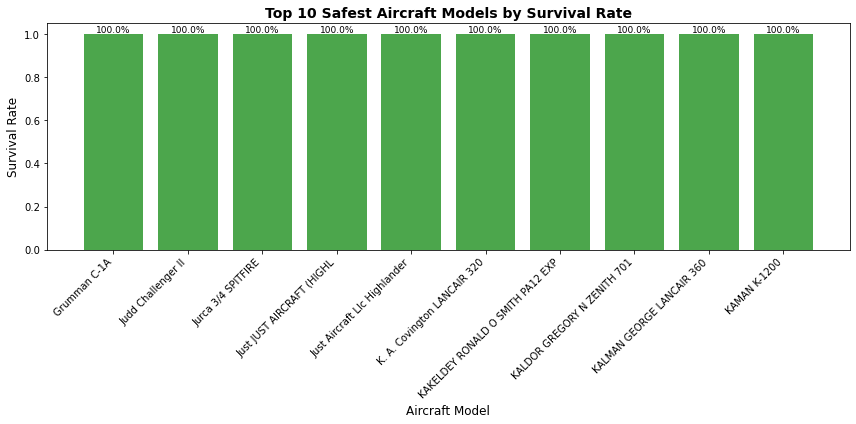

In [23]:
top_10_safe = survival_by_model.head(10)

# Create a figure and axis
plt.figure(figsize=(12, 6))
bars = plt.bar(
    top_10_safe['Make'] + ' ' + top_10_safe['Model'],  # Combine Make and Model for labels
    top_10_safe['Survival_Rate'],
    color='green',
    alpha=0.7
)

# Add labels and title
plt.xlabel('Aircraft Model', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)
plt.title('Top 10 Safest Aircraft Models by Survival Rate', fontsize=14, fontweight='bold')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Add percentage labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.1%}',  # Format as percentage (e.g., 95.2%)
        ha='center',
        va='bottom',
        fontsize=9
    )

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Understanding our bargraph above(Top 10 safest Models by Survival Rate)

In [24]:
print(survival_by_model['Survival_Rate'].describe())

count    16739.000000
mean         0.725235
std          0.399429
min          0.000000
25%          0.500000
50%          1.000000
75%          1.000000
max          1.000000
Name: Survival_Rate, dtype: float64


From the survival rate.describe()method we can see that a large portion of our aircrafts have perfect survival records of 100% that explains our bargraph above 

### Barh graph  for  top 10 aircraft model by total uninjured

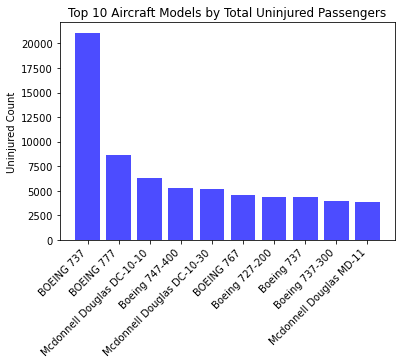

In [25]:
top_10_safe = survival_by_model.sort_values('Total.Uninjured', ascending=False).head(10)

plt.bar(
    top_10_safe['Make'] + ' ' + top_10_safe['Model'],
    top_10_safe['Total.Uninjured'],
    color='blue',
    alpha=0.7
)
plt.title('Top 10 Aircraft Models by Total Uninjured Passengers')
plt.ylabel('Uninjured Count')
plt.xticks(rotation=45, ha='right')
plt.show()

### Finding average fatality rate by Make and Model

In [26]:
# Group by Make & Model, calculate mean fatalities per accident
df_fatality_rate = (
    df_clean.groupby(['Make', 'Model'])['Total.Fatal.Injuries']
    .mean()
    .reset_index()
    .rename(columns={'Total.Fatal.Injuries': 'Avg_Fatalities_Per_Accident'})
    .sort_values('Avg_Fatalities_Per_Accident', ascending=False)
)

print("\nTop 10 Models by Fatality Rate (Per Accident):")
display(df_fatality_rate.head(10))



Top 10 Models by Fatality Rate (Per Accident):


,Make,Model,Avg_Fatalities_Per_Accident
4077,Boeing,747-168,349.0
19048,Tupolev,TU-154,349.0
4179,Boeing,767-366-ER,217.0
2449,BOEING,777 - 206,178.0
13073,Mcdonnell Douglas,DC-8-62,174.0
1293,Airbus Industrie,A 310,169.0
325,AIRBUS,A320 - 216,162.0
8278,Embraer,E135 Legacy,154.0
2498,BOEING,MD-83,153.0
310,AIRBUS,A310,152.0


## ii)Mechanical Failure by Aircraft Type

In [27]:
#finding out if any of the report status given indicated mechanical failure
print(df_clean['Report.Status'].unique())

['Probable Cause' 'Factual' 'Foreign' ...
 'The pilot did not ensure adequate clearance from construction vehicles during taxi.'
 'The pilot\x92s failure to secure the magneto switch before attempting to hand rotate the engine which resulted in an inadvertent engine start, a runaway airplane, and subsequent impact with parked airplanes. Contributing to the accident was the failure to properly secure the airplane with chocks.'
 'The pilot\x92s loss of control due to a wind gust during landing.']


In [28]:
mechanical_failures = df_clean[df_clean['Report.Status'].str.contains('Mechanical Failure', na=False, case=False)]

In [29]:
# Group by Broad Phase of Flight, Amateur Built, Number of Engines, and Engine Type
failure_counts = mechanical_failures.groupby(
    ['Broad.phase.of.flight', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type']
).size().reset_index(name='Failure_Count')

# Sort by the highest number of failures
failure_counts = failure_counts.sort_values(by='Failure_Count', ascending=False)

# Display the top 10 aircraft types with the most failures
print(failure_counts.head(10))

  Broad.phase.of.flight Amateur.Built  Number.of.Engines    Engine.Type  \
0               Unknown            No                1.0  Reciprocating   
2               Unknown            No                2.0  Reciprocating   
5               Unknown           Yes                1.0  Reciprocating   
3               Unknown            No                2.0      Turbo Fan   
1               Unknown            No                1.0      Turbo Fan   
4               Unknown            No                2.0      Turbo Jet   

   Failure_Count  
0             11  
2              3  
5              3  
3              2  
1              1  
4              1  


### Bar graph

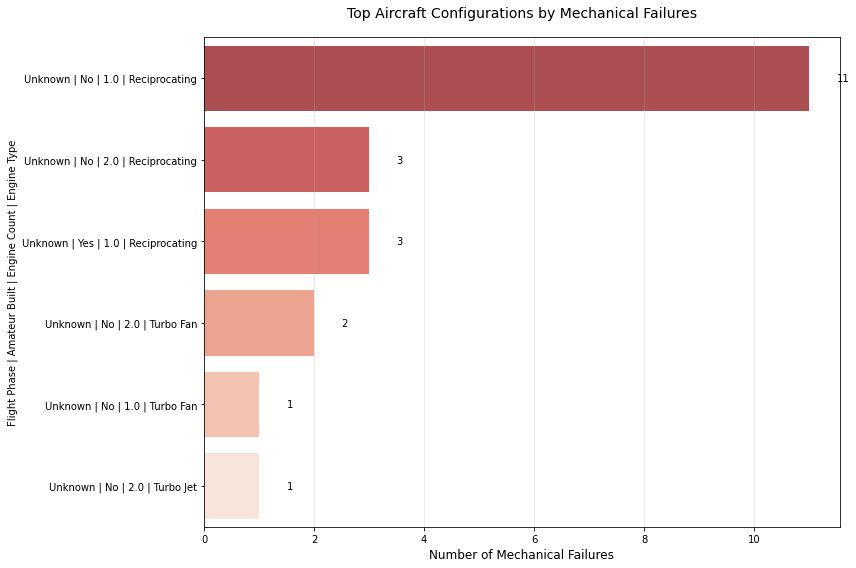

In [30]:
# Create a simplified label for plotting
failure_counts['Configuration'] = (
    failure_counts['Broad.phase.of.flight'] + " | " +
    failure_counts['Amateur.Built'].astype(str) + " | " +
    failure_counts['Number.of.Engines'].astype(str) + " | " +
    failure_counts['Engine.Type']
)

# Plot top 15 configurations
plt.figure(figsize=(12, 8))
sns.barplot(
    y='Configuration',
    x='Failure_Count',
    data=failure_counts.head(15),
    palette='Reds_r',
    alpha=0.8
)

# Customize plot
plt.title('Top Aircraft Configurations by Mechanical Failures', fontsize=14, pad=20)
plt.xlabel('Number of Mechanical Failures', fontsize=12)
plt.ylabel('Flight Phase | Amateur Built | Engine Count | Engine Type', fontsize=10)
plt.grid(axis='x', alpha=0.3)

# Add value labels
for i, value in enumerate(failure_counts.head(15)['Failure_Count']):
    plt.text(value + 0.5, i, str(value), va='center')

plt.tight_layout()
plt.show()

## ii)Accidents Hotspots by Location

In [31]:
accidents_by_location = df_clean.groupby(['Country', 'Location', 'Latitude', 'Longitude'])['Event.Id'].count().reset_index()
accidents_by_location.rename(columns={'Event.Id': 'Total_Accidents'}, inplace=True)

# Display top accident locations
print(accidents_by_location.sort_values(by='Total_Accidents', ascending=False).head(10))

             Country         Location   Latitude  Longitude  Total_Accidents
5104   United States    ANCHORAGE, AK  38.167361 -95.478611              360
22219  United States        MIAMI, FL  38.167361 -95.478611              185
4892   United States  ALBUQUERQUE, NM  38.167361 -95.478611              173
9292   United States      CHICAGO, IL  38.167361 -95.478611              171
17119  United States      HOUSTON, TX  38.167361 -95.478611              161
13546  United States    FAIRBANKS, AK  38.167361 -95.478611              128
25650  United States      ORLANDO, FL  38.167361 -95.478611              116
12975  United States    ENGLEWOOD, CO  38.167361 -95.478611              112
33021  United States       TUCSON, AZ  38.167361 -95.478611              105
5890   United States    Anchorage, AK  38.167361 -95.478611              102


Explanation:

This groups data by Country, Location (City), Latitude, and Longitude.

It counts the number of accidents (Event.Id count) for each location.

### Scatter plot

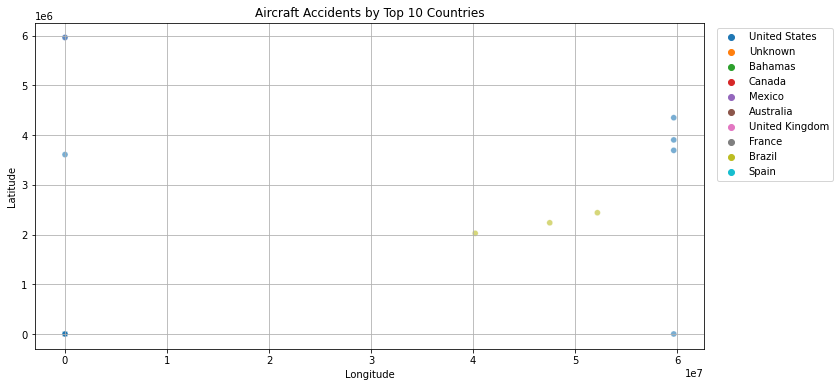

In [32]:
top_countries = df_clean['Country'].value_counts().head(10).index
df_top_countries = df_clean[df_clean['Country'].isin(top_countries)]

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Longitude', y='Latitude', hue='Country', data=df_top_countries, alpha=0.6, palette='tab10')

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Aircraft Accidents by Top 10 Countries")

plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.grid(True)

plt.show()

## iv)Accidents by Broad Phase of Flight

In [33]:
# Count the number of accidents by Broad Phase of Flight
phase_counts = df_clean['Broad.phase.of.flight'].value_counts()

# Display the counts
print(phase_counts)

Unknown        27713
Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Other            119
Name: Broad.phase.of.flight, dtype: int64


### Bar graph to visualize

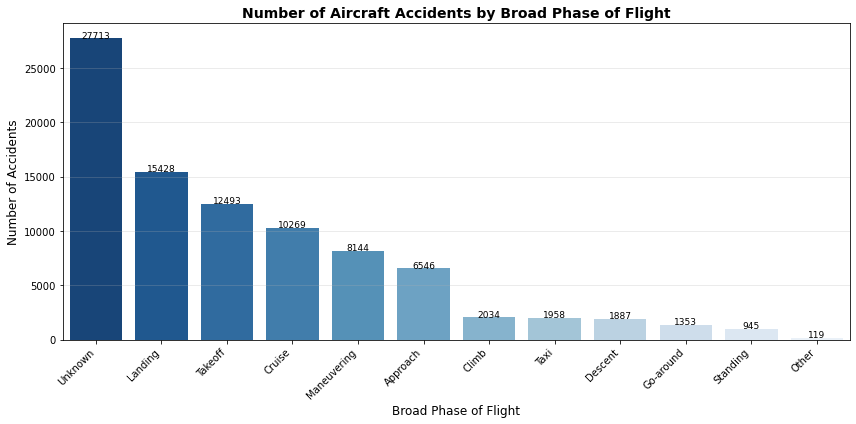

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of accidents by Broad Phase of Flight
phase_counts = df_clean['Broad.phase.of.flight'].value_counts()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=phase_counts.index, y=phase_counts.values, palette='Blues_r')

# Add labels and title
plt.xlabel('Broad Phase of Flight', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.title('Number of Aircraft Accidents by Broad Phase of Flight', fontsize=14, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add value labels
for index, value in enumerate(phase_counts.values):
    plt.text(index, value + 50, str(value), ha='center', fontsize=9)

plt.tight_layout()
plt.grid(axis='y', alpha=0.3)
plt.show()


# KEY INSIGHTS

i)The USA has the highest Number of Accidents.

ii)The majority of the accidents occur during takeoff.

iii)Single engine aircraft have high fatality rate compared to multi-engine aircraft

iv)Aircraft with certain manufactures have lower accidents rate making them good candidates for purchase


# KEY RECOMMENDATIONS
i)Invest in aircraft with low accidents rates

ii)Avoid single engine aircraft for commercial purposes

iii)Conduct additional check ups for aircraft used during landing and takeoff of phases


# Conclusion
This analysis provides valuable insights into aviation risks.Future Work can include:

More granular analysis by aircraft age,maintenance records and weather conditions